In [1]:
# Importing necessary libs
import pandas as pd
import numpy as np
import os
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

In [2]:

PATH = 'data/'


def merge_datasets():
    """
    Function to merge all the datasets in the specified directory and create a single dataset
    with an additional 'spending_type' column to identify income and expenses.
    """
    df_income = [] 
    df_expense = []
    for file in os.listdir(PATH):
        if file.endswith('.xlsx') or file.endswith('.csv'):  # Corrected the condition
            # Data with income
            df_income_temp = pd.read_excel(f'{PATH}{file}', skiprows=1, sheet_name='Income')
            df_income_temp['spending_type'] = 'Income'  # identifier column
            df_income.append(df_income_temp)

            # Data with expense
            df_expense_temp = pd.read_excel(f'{PATH}{file}', skiprows=1, sheet_name='Expenses')
            df_expense_temp['spending_type'] = 'Expense'  # identifier column
            df_expense.append(df_expense_temp)

    # concatenate income and expense data into a single DataFrame
    df_income = pd.concat(df_income, ignore_index=True)
    df_expense = pd.concat(df_expense, ignore_index=True)

    # merge income and expense data
    df_combined = pd.concat([df_income, df_expense], ignore_index=True)
    
    # Cleaning the data
    df_combined.sort_values(by='Date and time', inplace=True)
    # remove columns
    df_combined.drop(['Amount in account currency', 'Account currency','Transaction amount in transaction currency', 'Transaction currency', 'Tags', 'Account','Default currency', 'Comment'], axis=1, inplace=True) # can include if needed

    return df_combined




In [3]:
df = merge_datasets()
df_expense= df[df['spending_type'] == 'Expense']
df_income = df[df['spending_type'] == 'Income']

In [4]:
total_expense = df_expense['Amount in default currency'].sum()
total_income = df_income['Amount in default currency'].sum()

print(f"Total income: {total_income}")
print(f"Total expense: {total_expense}")

Total income: 45533.14
Total expense: 41572.86


In [5]:
# plotting income and expense
fig = px.box(df_expense, 
             x='spending_type', 
             y='Amount in default currency', 
             color='spending_type', 
             width=800, 
             height=800 ,
             title='Total Income and Expense',
             labels=
             {'spending_type':'Type of spending', 'Amount in default currency':'Amount'}
            )
fig.show()

In [6]:

# grouped by category for expense
df_expense_grouped = df_expense.groupby('Category', as_index=False)['Amount in default currency'].sum()

# plotting expenses by category
fig = px.bar(df_expense_grouped, 
             x='Category', 
             y='Amount in default currency', 
             color='Category', 
             title='Total Expense by Category',
             labels={'Category': 'Category', 'Amount in default currency': 'Amount in CAD'},
             width=1200,
             height=800,
            )

fig.show()


In [7]:

# grouped by category for income
df_income_grouped = df_income.groupby('Category', as_index=False)['Amount in default currency'].sum()

# plotting expenses by category
fig = px.bar(df_income_grouped, 
             x='Category', 
             y='Amount in default currency', 
             color='Category', 
             title='Total Income by Category',
             labels={'Category': 'Category', 'Amount in default currency': 'Amount in CAD'},
             width=1200,
             height=800,
            )

fig.show()


In [8]:
display(df_income_grouped, df_expense_grouped)

,Category,Amount in default currency
0,Balancing,321.52
1,Cashback,26.00
2,Other,1351.00
3,Paycheck,12678.92
4,TAX RETURNS,1590.00
5,Transfer,29565.70


,Category,Amount in default currency
0,Balancing,171.93
1,Cafe,4678.76
2,Education,19795.87
3,Fashion,428.78
4,Gadgets,85.71
5,Gifts,627.72
6,Groceries,2340.62
7,Haircut,65.55
8,Home,10700.00
9,Laptop repair,135.60


In [9]:
# grouped by date and time for income and expense
df_grouped = df.groupby(['Date and time', 'spending_type'], as_index=False)['Amount in default currency'].sum()

fig = px.line(df_grouped, 
              x='Date and time', 
              y='Amount in default currency', 
              color='spending_type',  # Different colors for Income and Expense
              title='Time Series of Income and Expense',
              labels={'spending_type': 'Type', 'Amount in default currency': 'Amount in CAD'},
              width=1900,
              height=900,
              
             )

fig.show()


In [10]:
# preping data
df
# # One-Hot Encoding for 'Category'
# df = pd.get_dummies(df, columns=['Category'], drop_first=True)

# Label Encoding for 'spending_type' and 'Category'
label_encoder = LabelEncoder()
df['spending_type_encoded'] = label_encoder.fit_transform(df['spending_type'])
df['Category_encoded'] = label_encoder.fit_transform(df['Category'])





In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def create_mapping_df(original_column, encoded_column, title):
    # Create a mapping DataFrame
    mapping_df = pd.DataFrame({
        'Original': df[original_column],
        'Encoded': df[encoded_column]
    }).drop_duplicates().sort_values('Encoded')
    
    # Set the name of the DataFrame
    mapping_df.name = title
    
    return mapping_df

# Create mapping DataFrame for spending_type
spending_type_mapping_df = create_mapping_df('spending_type', 'spending_type_encoded', 'Spending Type to Label Encoding Mapping')

# Create mapping DataFrame for Category
category_mapping_df = create_mapping_df('Category', 'Category_encoded', 'Category to Label Encoding Mapping')



In [12]:
# Display the first few rows of each mapping DataFrame
print("\nSpending Type Mapping DataFrame:")
spending_type_mapping_df




Spending Type Mapping DataFrame:


,Original,Encoded
144,Expense,0
13,Income,1


In [13]:
print("\nCategory Mapping DataFrame:")
category_mapping_df




Category Mapping DataFrame:


,Original,Encoded
9,Balancing,0
114,Cafe,1
18,Cashback,2
118,Education,3
173,Fashion,4
229,Gadgets,5
95,Gifts,6
143,Groceries,7
389,Haircut,8
135,Home,9


In [14]:
df.drop(columns=['Category', 'spending_type'], inplace=True)
df

,Date and time,Amount in default currency,spending_type_encoded,Category_encoded
144,2023-04-28,50.00,0,15
13,2023-05-02,1350.00,1,13
143,2023-05-03,74.52,0,7
138,2023-05-05,5.89,0,18
139,2023-05-05,128.19,0,15
...,...,...,...,...
147,2024-09-24,34.28,0,1
146,2024-09-25,69.55,0,7
15,2024-09-26,8.00,1,0
14,2024-09-27,149.00,1,14


In [15]:
# sperating date by year and month and day
df['Year'] = pd.DatetimeIndex(df['Date and time']).year
df['Month'] = pd.DatetimeIndex(df['Date and time']).month
# df['Day'] = pd.DatetimeIndex(df['Date and time']).day

df.drop(columns=['Date and time'], inplace=True)
df
#renaming columns
df = df.rename(columns={'Category_encoded': 'Category', 'spending_type_encoded': 'Type', 'Amount in default currency': 'Amount',})

#renaming columns
df = df.rename(columns={'Category_encoded': 'Category', 'spending_type_encoded': 'Type', 'Ammount in default currency': 'Amount',})

# reordering columns
df = df[['Year', 'Month', 'Type', 'Category', 'Amount']]
df.head(50)

,Year,Month,Type,Category,Amount
144,2023,4,0,15,50.00
13,2023,5,1,13,1350.00
143,2023,5,0,7,74.52
138,2023,5,0,18,5.89
139,2023,5,0,15,128.19
140,2023,5,0,18,9.68
141,2023,5,0,18,4.46
142,2023,5,0,20,300.00
137,2023,5,0,7,23.00
11,2023,5,1,13,1.00


In [16]:
# Calculate correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,Year,Month,Type,Category,Amount
Year,1.000000,-0.563343,0.000866,-0.218668,-0.128727
Month,-0.563343,1.000000,0.034988,0.000314,0.072739
Type,0.000866,0.034988,1.000000,0.443416,0.347448
Category,-0.218668,0.000314,0.443416,1.000000,0.263460
Amount,-0.128727,0.072739,0.347448,0.263460,1.000000


In [17]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import joblib


# features and target variable
X = df.drop('Amount', axis=1)
y = df['Amount']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR()
}

# evaluate each model
def evaluate_model(model, X, y):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    return -cv_scores.mean()

# evaluate each model and print the results
results = {}
for name, model in models.items():
    mse = evaluate_model(model, X_train_scaled, y_train)
    results[name] = mse
    print(f"{name} - MSE: {mse:.2f}- RMSE: {np.sqrt(mse):.2f}")

Linear Regression - MSE: 592176.66- RMSE: 769.53
Ridge Regression - MSE: 592104.46- RMSE: 769.48
Lasso Regression - MSE: 592054.26- RMSE: 769.45
Random Forest - MSE: 568678.10- RMSE: 754.11
SVR - MSE: 720862.07- RMSE: 849.04


In [372]:
#select best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# training the best model
best_model.fit(X_train_scaled, y_train)

# making predictions
y_pred = best_model.predict(X_test_scaled)

# calculating metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# printing metrics
print(f"\nBest Model: {best_model_name}")
print(f"Test MSE: {mse:.2f}")
print(f"Test R2 Score: {r2:.2f}")

# Save the best model
if not os.path.exists('models'):
    os.makedirs('models')

# saving the model
joblib.dump(best_model, 'models/best_financial_model.joblib')
print("Best model saved as 'best_financial_model.joblib'")

# saving the scaler
joblib.dump(scaler, 'models/feature_scaler.joblib')
print("Feature scaler saved as 'feature_scaler.joblib'")






Best Model: Random Forest
Test MSE: 546874.97
Test R2 Score: -7.16
Best model saved as 'best_financial_model.joblib'
Feature scaler saved as 'feature_scaler.joblib'


In [373]:
from sklearn.model_selection import GridSearchCV

# param grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# perform grid search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='neg_mean_squared_error')


grid_search.fit(X_train_scaled, y_train)

# stroing best parameters
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best MSE: {best_score:.2f}")

# best model
fine_tuned_model = grid_search.best_estimator_


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best MSE: 485812.93


e:\PROJECTS\Financial_Analysis\venv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
396 fits failed with the following error:
Traceback (most recent call last):
  File "e:\PROJECTS\Financial_Analysis\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\PROJECTS\Financial_Analysis\venv\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "e:\PROJECTS\Financial_Analysis\venv\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  

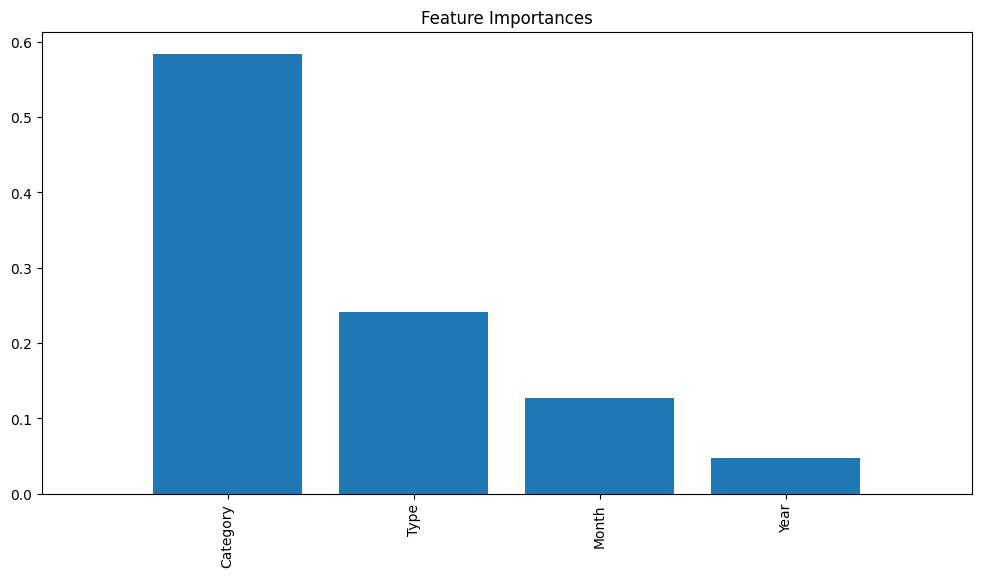

In [374]:
import matplotlib.pyplot as plt

feature_importances = fine_tuned_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [375]:
# model evaluation
y_pred_test = fine_tuned_model.predict(X_test_scaled)
final_mse = mean_squared_error(y_test, y_pred_test)
final_r2 = r2_score(y_test, y_pred_test)

print(f"Final Test MSE: {final_mse:.2f}")
print(f"Final Test R² Score: {final_r2:.2f}")

if not os.path.exists('models'):
    os.makedirs('models')

# saving the model
joblib.dump(fine_tuned_model, 'models/best_financial_model_FT.joblib')






Final Test MSE: 95924.73
Final Test R² Score: -0.43


['models/best_financial_model_FT.joblib']

In [380]:

# Function to make new predictions
def predict_amount(model, scaler, new_data):
    new_data_scaled = scaler.transform(new_data)
    return model.predict(new_data_scaled)

# Function to get user input for prediction
def get_input_and_predict():
    # Get year, month, and day from user
    year = int(input("Enter the year (e.g., 2024): "))
    month = int(input("Enter the month (1-12): "))
    # day = int(input("Enter the day (1-31): "))
    
    # Get spending type from user
    spending_type_input = input("Enter spending type (Income/Expense): ")
    
    # Get category from user
    category_input = input("Enter category: ")

    # Validate spending type
    spending_type_encoded = spending_type_mapping_df[
        spending_type_mapping_df['Original'].str.lower() == spending_type_input.lower()
    ]

    # Validate category
    category_encoded = category_mapping_df[
        category_mapping_df['Original'].str.lower() == category_input.lower()
    ]

    # Check if spending type is valid
    if spending_type_encoded.empty:
        print(f"Error: Spending type '{spending_type_input}' not found.")
        return
    
    # Check if category is valid
    if category_encoded.empty:
        print(f"Error: Category '{category_input}' not found.")
        return

    # Get the encoded values
    spending_type_value = spending_type_encoded['Encoded'].values[0]
    category_value = category_encoded['Encoded'].values[0]

    # Create new_data DataFrame for prediction
    new_data = pd.DataFrame({
        'Year': [year],
        'Month': [month],
        'Type': [spending_type_value],  # Encoded spending type
        'Category': [category_value]      # Encoded category
    })
    
    # Make prediction
    prediction = predict_amount(fine_tuned_model, scaler, new_data)
    print(f"Predicted Amount for {spending_type_input} in category '{category_input}' on {year}-{month:02d}: ${prediction[0]:.2f}")

# Example usage
get_input_and_predict()


Predicted Amount for expense in category 'home' on 2024-01: $351.39


In [377]:
spending_type_mapping_df

,Original,Encoded
144,Expense,0
13,Income,1


In [378]:
category_mapping_df

,Original,Encoded
9,Balancing,0
114,Cafe,1
18,Cashback,2
118,Education,3
173,Fashion,4
229,Gadgets,5
95,Gifts,6
143,Groceries,7
389,Haircut,8
135,Home,9
